# Laboratorio 2: Armado de un esquema de aprendizaje automático

En el laboratorio final se espera que puedan poner en práctica los conocimientos adquiridos en el curso, trabajando con un conjunto de datos de clasificación.

El objetivo es que se introduzcan en el desarrollo de un esquema para hacer tareas de aprendizaje automático: selección de un modelo, ajuste de hiperparámetros y evaluación.

El conjunto de datos a utilizar está en `./data/loan_data.csv`. Si abren el archivo verán que al principio (las líneas que empiezan con `#`) describen el conjunto de datos y sus atributos (incluyendo el atributo de etiqueta o clase).

Se espera que hagan uso de las herramientas vistas en el curso. Se espera que hagan uso especialmente de las herramientas brindadas por `scikit-learn`.

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# TODO: Agregar las librerías que hagan falta
from sklearn.model_selection import train_test_split

from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

## Carga de datos y división en entrenamiento y evaluación

La celda siguiente se encarga de la carga de datos (haciendo uso de pandas). Estos serán los que se trabajarán en el resto del laboratorio.

In [16]:
dataset = pd.read_csv("./data/loan_data.csv", comment="#")

# División entre instancias y etiquetas
X, y = dataset.iloc[:, 1:], dataset.TARGET.ravel()

# división entre entrenamiento y evaluación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [17]:
dataset

,TARGET,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,0,4700,88026.0,115506.0,6.0,0.0,0.0,182.248332,0.0,27.0,29.209023
1,0,19300,39926.0,101208.0,4.0,0.0,0.0,140.051638,0.0,14.0,31.545694
2,0,5700,71556.0,79538.0,2.0,0.0,0.0,92.643085,0.0,15.0,41.210012
3,0,13000,44875.0,57713.0,0.0,1.0,0.0,184.990324,1.0,12.0,28.602076
4,0,19300,72752.0,106084.0,11.0,0.0,0.0,193.707100,1.0,13.0,30.686106
...,...,...,...,...,...,...,...,...,...,...,...
1849,1,53400,228236.0,305514.0,6.0,0.0,0.0,11.148069,0.0,2.0,34.558417
1850,1,53600,235895.0,299772.0,5.0,0.0,0.0,112.748282,7.0,22.0,44.945929
1851,1,53600,208197.0,297280.0,4.0,1.0,1.0,160.485251,2.0,29.0,41.646731
1852,1,65500,205156.0,290239.0,2.0,0.0,0.0,98.808206,1.0,21.0,144.189001



Documentación:

- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

## Ejercicio 1: Descripción de los Datos y la Tarea

Responder las siguientes preguntas:

1. ¿De qué se trata el conjunto de datos?
2. ¿Cuál es la variable objetivo que hay que predecir? ¿Qué significado tiene?
3. ¿Qué información (atributos) hay disponible para hacer la predicción?
4. ¿Qué atributos imagina ud. que son los más determinantes para la predicción?



## Respuesta
1. Es un conjunto de datos sobre informacion bancaria de personas. El banco busca automatizar las desiciones al otorgar un credito y así cumplir con la "Equal Credit Opportunity Act"
2. El objetivo del data set es la de predecir si las personas del mismo son aptas o no para recibir un credito hipotecario.
3. Los atributos disponibles para la prediccion son:
TARGET  Label: 1 = client defaulted on loan - 0 = loan repaid
 LOAN    Amount of the loan request
 MORTDUE Amount due on existing mortgage
 VALUE   Value of current property
 YOJ     Years at present job
 DEROG   Number of major derogatory reports
 DELINQ  Number of delinquent credit lines
 CLAGE   Age of oldest trade line in months
 NINQ    Number of recent credit lines
 CLNO    Number of credit lines
 DEBTINC Debt-to-income ratio


4. Entre los atributos que podemos establecer como importantes a la hora de evaluar podemos encontrar:
DELINQ  Number of delinquent credit lines (creditos inpagos)
VALUE   Value of current property
LOAN    Amount of the loan request
MORTDUE Amount due on existing mortgage

## Ejercicio 2: Predicción con Modelos Lineales

En este ejercicio se entrenarán modelos lineales de clasificación para predecir la variable objetivo.

Para ello, deberán utilizar la clase SGDClassifier de scikit-learn.

Documentación:
- https://scikit-learn.org/stable/modules/sgd.html
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html


### Ejercicio 2.1: SGDClassifier con hiperparámetros por defecto

Entrenar y evaluar el clasificador SGDClassifier usando los valores por omisión de scikit-learn para todos los parámetros. Únicamente **fijar la semilla aleatoria** para hacer repetible el experimento.

Evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión

In [18]:
clf = SGDClassifier(random_state= 5)
scaler = StandardScaler()
model = make_pipeline(scaler, clf)
model = model.fit(X_train, y_train)

#### Analizamos resultados para el conjunto de entrenamiento 

Conjunto train 

              precision    recall  f1-score   support

           0       0.88      0.95      0.92      1232
           1       0.61      0.39      0.48       251

    accuracy                           0.85      1483
   macro avg       0.75      0.67      0.70      1483
weighted avg       0.84      0.85      0.84      1483



<AxesSubplot:>

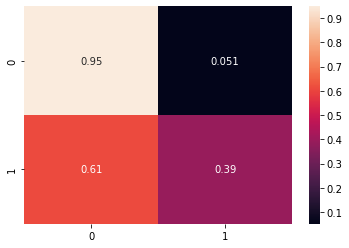

In [44]:
y_pred_train = model.predict(X_train)
cm= confusion_matrix(y_train, y_pred_train)
print('Conjunto train \n')
print(classification_report(y_train, y_pred_train))

sns.heatmap(confusion_matrix(y_train, y_pred_train, normalize = 'true'), annot= True)

#### Analizamos resultados para el conjunto de testeo

Resultados para conjunto de test 

              precision    recall  f1-score   support

           0       0.88      0.96      0.92       313
           1       0.58      0.33      0.42        58

    accuracy                           0.86       371
   macro avg       0.73      0.64      0.67       371
weighted avg       0.84      0.86      0.84       371



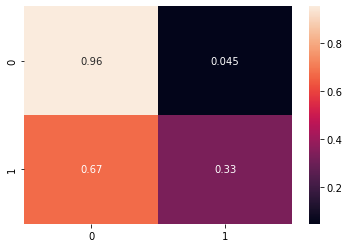

In [23]:
y_pred = model.predict(X_test)
sns.heatmap(confusion_matrix(y_test, y_pred, normalize = 'true'), annot= True)
print('Resultados para conjunto de test \n')
print(classification_report(y_test, y_pred))

### Ejercicio 2.2: Ajuste de Hiperparámetros

Seleccionar valores para los hiperparámetros principales del SGDClassifier. Como mínimo, probar diferentes funciones de loss, tasas de entrenamiento y tasas de regularización.

Para ello, usar grid-search y 5-fold cross-validation sobre el conjunto de entrenamiento para explorar muchas combinaciones posibles de valores.

Reportar accuracy promedio y varianza para todas las configuraciones.

Para la mejor configuración encontrada, evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión

Documentación:
- https://scikit-learn.org/stable/modules/grid_search.html
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [24]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'sgdclassifier__loss': ['hinge', 'log', 'perceptron'],
    'sgdclassifier__alpha': [0.001, 0.0001, 0.00001],
    'sgdclassifier__penalty': ['l2','l1','elasticnet'],
    'sgdclassifier__class_weight' : ['balanced']
}

cv = GridSearchCV(model, param_grid, scoring='recall', cv=5)
cv.fit(X_train, y_train)

results = cv.cv_results_
df = pd.DataFrame(results)

df[['param_sgdclassifier__loss', 'param_sgdclassifier__alpha', 'param_sgdclassifier__penalty', 'mean_test_score', 'std_test_score', 'rank_test_score']].sort_values('rank_test_score')


,param_sgdclassifier__loss,param_sgdclassifier__alpha,param_sgdclassifier__penalty,mean_test_score,std_test_score,rank_test_score
19,hinge,0.00001,l1,0.709176,0.015579,1
3,log,0.001,l2,0.704941,0.079076,2
5,log,0.001,elasticnet,0.701098,0.054118,3
14,log,0.0001,elasticnet,0.688863,0.071118,4
18,hinge,0.00001,l2,0.686039,0.138162,5
13,log,0.0001,l1,0.684627,0.083554,6
11,hinge,0.0001,elasticnet,0.677804,0.086176,7
4,log,0.001,l1,0.669490,0.046924,8
21,log,0.00001,l2,0.665490,0.125625,9
8,perceptron,0.001,elasticnet,0.665490,0.194169,10


##### Mejores parámetros

In [25]:
cv.best_params_

{'sgdclassifier__alpha': 1e-05,
 'sgdclassifier__class_weight': 'balanced',
 'sgdclassifier__loss': 'hinge',
 'sgdclassifier__penalty': 'l1'}

##### Mejores estimadores

In [26]:
cv.best_estimator_

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdclassifier',
                 SGDClassifier(alpha=1e-05, class_weight='balanced',
                               penalty='l1', random_state=5))])

#### Analizamos resultados para el conjunto de entrenamiento

Resultados para el mejor modelo conjunto train 

              precision    recall  f1-score   support

           0       0.89      0.61      0.73      1232
           1       0.25      0.63      0.36       251

    accuracy                           0.62      1483
   macro avg       0.57      0.62      0.54      1483
weighted avg       0.78      0.62      0.66      1483



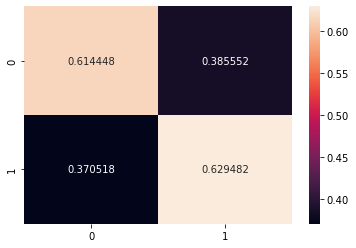

In [27]:
y_pred_train = cv.predict(X_train)
print('Resultados para el mejor modelo conjunto train \n')
sns.heatmap(confusion_matrix(y_train, y_pred_train, normalize = 'true'), annot=True, fmt='g')
print(classification_report(y_train, y_pred_train))

#### Analizamos resultados para el conjunto de testeo

Resultados para el mejor modelo conjunto test 

              precision    recall  f1-score   support

           0       0.91      0.64      0.75       313
           1       0.25      0.66      0.36        58

    accuracy                           0.64       371
   macro avg       0.58      0.65      0.56       371
weighted avg       0.81      0.64      0.69       371



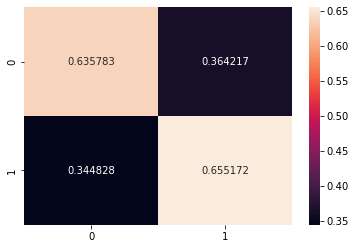

In [28]:
y_pred = cv.predict(X_test)
print('Resultados para el mejor modelo conjunto test \n')
sns.heatmap(confusion_matrix(y_test, y_pred, normalize = 'true'), annot=True, fmt='g')
print(classification_report(y_test, y_pred))

## Ejercicio 3: Árboles de Decisión

En este ejercicio se entrenarán árboles de decisión para predecir la variable objetivo.

Para ello, deberán utilizar la clase DecisionTreeClassifier de scikit-learn.

Documentación:
- https://scikit-learn.org/stable/modules/tree.html
  - https://scikit-learn.org/stable/modules/tree.html#tips-on-practical-use
- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
- https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html

### Ejercicio 3.1: DecisionTreeClassifier con hiperparámetros por defecto

Entrenar y evaluar el clasificador DecisionTreeClassifier usando los valores por omisión de scikit-learn para todos los parámetros. Únicamente **fijar la semilla aleatoria** para hacer repetible el experimento.

Evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión


In [29]:
from sklearn.tree import DecisionTreeClassifier

#Se realiza Desicion Tree Classiifer con todos los valores por defecto
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [30]:
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

### Arbol de decisión

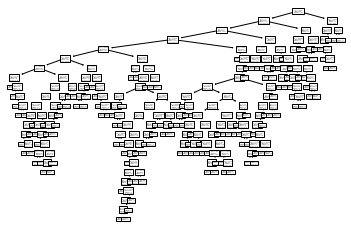

In [31]:
from sklearn.tree import plot_tree

plot_tree(clf);

In [32]:
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
print(f'Train accuracy: {train_acc:0.2}')
print(f'Test accuracy: {test_acc:0.2}')

Train accuracy: 1.0
Test accuracy: 0.88


#### Se observa que tiene un accuracy del 100% para el conjunto de entrenamiento, esto quiere decir que realiza el arbol hasta cada hoja resultando en sobre ajuste. 
#### Para el conjunto de datos de test tiene un accuracy del 88%

# A continuación Analizamos: Accuracy, Precision Recall, F1 y matriz de confusión

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1232
           1       1.00      1.00      1.00       251

    accuracy                           1.00      1483
   macro avg       1.00      1.00      1.00      1483
weighted avg       1.00      1.00      1.00      1483



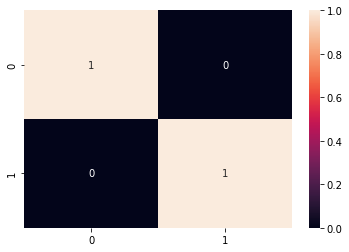

In [34]:

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

y_pred_train = clf.predict(X_train)
sns.heatmap(confusion_matrix(y_train, y_pred_train, normalize = 'true'), annot=True, fmt='g')
print(classification_report(y_train, y_pred_train))

### Analizamos Accuracy Precision Recall F1 matriz de confusión para el conjunto de test

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       313
           1       0.62      0.64      0.63        58

    accuracy                           0.88       371
   macro avg       0.77      0.78      0.78       371
weighted avg       0.88      0.88      0.88       371



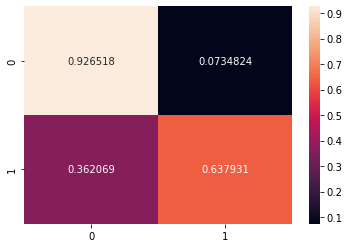

In [35]:
y_pred = clf.predict(X_test)
sns.heatmap(confusion_matrix(y_test, y_pred, normalize = 'true'), annot= True, fmt='g')
print(classification_report(y_test, y_pred))

### Ejercicio 3.2: Ajuste de Hiperparámetros

Seleccionar valores para los hiperparámetros principales del DecisionTreeClassifier. Como mínimo, probar diferentes criterios de partición (criterion), profundidad máxima del árbol (max_depth), y cantidad mínima de samples por hoja (min_samples_leaf).

Para ello, usar grid-search y 5-fold cross-validation sobre el conjunto de entrenamiento para explorar muchas combinaciones posibles de valores.

Reportar accuracy promedio y varianza para todas las configuraciones.

Para la mejor configuración encontrada, evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión


Documentación:
- https://scikit-learn.org/stable/modules/grid_search.html
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC


In [37]:
param_grid =dict(criterion= ['gini', 'entropy'],
                  max_depth=range(1,25),
                  min_samples_leaf = range(1,10),
                  min_samples_split = range(2,5),
                  class_weight= ['balanced']
                  )

#Se realiza grid-search y 5-fold cross-validation mediante la funcion GridSearchCV y el parametro cv

GridSearchCV = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid, scoring='recall', cv=5)


In [38]:
GridSearchCV.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'class_weight': ['balanced'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 25),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 5)},
             scoring='recall')

### observamos los mejores parametros

In [39]:

GridSearchCV.best_params_

{'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 6,
 'min_samples_leaf': 8,
 'min_samples_split': 2}

### Observamos la mejor accuracy

In [40]:

GridSearchCV.best_score_

0.7090196078431372

In [41]:
#Se genera DF con todos los resultados y parametros
df = pd.DataFrame(GridSearchCV.cv_results_)
df.sort_values('rank_test_score').head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class_weight,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
158,0.004201,4.001381e-04,0.0012,3.998280e-04,balanced,gini,6,8,4,"{'class_weight': 'balanced', 'criterion': 'gin...",0.62,0.66,0.745098,0.82,0.70,0.709020,0.069321,1
157,0.004001,3.371748e-07,0.0012,4.003287e-04,balanced,gini,6,8,3,"{'class_weight': 'balanced', 'criterion': 'gin...",0.62,0.66,0.745098,0.82,0.70,0.709020,0.069321,1
156,0.004001,2.431402e-07,0.0010,2.780415e-07,balanced,gini,6,8,2,"{'class_weight': 'balanced', 'criterion': 'gin...",0.62,0.66,0.745098,0.82,0.70,0.709020,0.069321,1
149,0.004001,3.568323e-07,0.0012,4.001379e-04,balanced,gini,6,5,4,"{'class_weight': 'balanced', 'criterion': 'gin...",0.62,0.68,0.705882,0.76,0.76,0.705176,0.052727,4
147,0.004201,4.000904e-04,0.0012,4.003526e-04,balanced,gini,6,5,2,"{'class_weight': 'balanced', 'criterion': 'gin...",0.62,0.68,0.705882,0.76,0.76,0.705176,0.052727,4


### Analizamos Accuracy Precision Recall F1 matriz de confusión para el conjunto de train y test para los mejores parametros evitando el sobre ajuste

              precision    recall  f1-score   support

           0       0.95      0.86      0.90      1232
           1       0.54      0.78      0.64       251

    accuracy                           0.85      1483
   macro avg       0.74      0.82      0.77      1483
weighted avg       0.88      0.85      0.86      1483



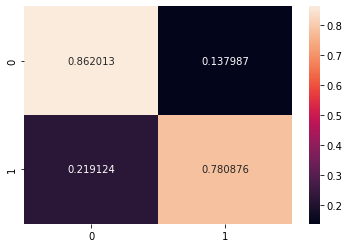

In [42]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import classification_report

y_pred_train = GridSearchCV.predict(X_train)
sns.heatmap(confusion_matrix(y_train, y_pred_train, normalize = 'true'), annot=True, fmt='g')
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.94      0.81      0.87       313
           1       0.43      0.74      0.54        58

    accuracy                           0.80       371
   macro avg       0.69      0.78      0.71       371
weighted avg       0.86      0.80      0.82       371



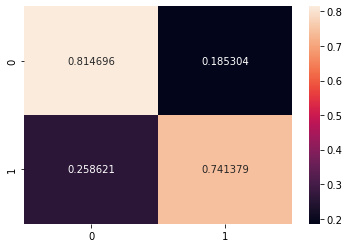

In [43]:
y_pred = GridSearchCV.predict(X_test)
sns.heatmap(confusion_matrix(y_test, y_pred, normalize = 'true'), annot= True, fmt='g')
print(classification_report(y_test, y_pred))